In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import os
from collections import Counter

from time import time

%matplotlib inline

import scipy.sparse

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('axes', labelsize='large') 

In [3]:
def id_counter(id_list):
    cnt = Counter()
    for el in id_list:
        cnt[el[u'element']] = el[u'count']
    return cnt

def_black_list = { 'unit', 'units', 'value', 'values', 'axis', 'axes', 'factor', 'factors', 'line', 'lines',
                 'point', 'points', 'number', 'numbers', 'variable', 'variables', 'respect', 'case', 'cases',
                 'vector', 'vectors', 'element', 'elements', 'example', 
                 'integer', 'integers', 'term', 'terms', 'parameter', 'parameters', 'coefficient', 'coefficients',
                 'formula', 'times', 'product', 'matrices', 'expression', 'complex', 'real', 'zeros', 'bits',
                 'sign',
                 'if and only if',
                 'alpha', 'beta', 'gamma', 'delta', 'epsilon', 'zeta', 'eta', 'theta', 'iota', 'kappa', 'lambda', 
                 'mu', 'nu', 'xi', 'omicron', 'pi', 'rho', 'sigma', 'tau', 'upsilon', 'phi', 'chi', 'psi', 'omega'}

def valid_def(definition):
    if len(definition) <= 3:
        return False

    return definition.lower() not in def_black_list

def rel_to_dict(rels):
    res = defaultdict(list)
    for r in rels:
        if not valid_def(r['definition']):
            continue
        res[r['identifier']].append((r['definition'], r['score']))
    return res

In [4]:
from collections import defaultdict

doc_categories = defaultdict(set)
category_docs = defaultdict(set)

for line in file('C:/tmp/mlp/category_info_refined.txt'):
    title, cat = line.strip().split('\t')
    title = title.decode('utf-8')
    cat = cat.decode('utf-8')

    # let's also remove all documents from "OTHER" category
    if cat == u'OTHER':
        continue

    doc_categories[title].add(cat) 
    category_docs[cat].add(title)

In [5]:
root = 'C:/tmp/mlp/mlp-output/'

docs = []
titles = []
ids = []
rels = []

empty = 0
small = 0
uncategorized = 0

for f in os.listdir(root): 
    for line in file(root + f):
        doc = json.loads(line)

        title = doc['title']        
        if title not in doc_categories:
            uncategorized = uncategorized + 1
            continue

        if '(disambiguation)' in title:
            continue

        id_bag = id_counter(doc['identifiers'])
        if len(id_bag) <= 1:
            if len(id_bag) == 0:
                empty = empty + 1
            else:
                small = small + 1
            continue

        docs.append(doc)
        titles.append(title)
        ids.append(id_bag)

        id_rels = rel_to_dict(doc['relations'])
        rels.append(id_rels)

print empty, small, uncategorized

N_doc = len(ids)
print N_doc

0 0 7501
22512


## Some stats

In [6]:
cnt = Counter()

for id_list in ids:
    cnt.update(id_list)

In [53]:
cnt_pd = pd.Series(cnt.values())
cnt_pd.sort(ascending=0, inplace=1)

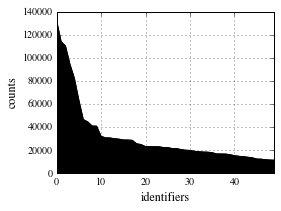

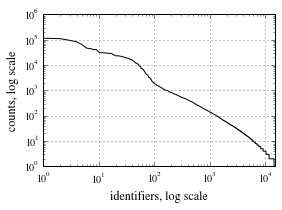

In [56]:
cnt_pd[:50].plot(kind='area', use_index=0, figsize=(4, 3), color='black')
plt.ylabel('counts')
plt.xlabel('identifiers')
plt.tight_layout()

plt.savefig('figures/en-wiki-ids-1.pdf', format='pdf')
plt.show()

cnt_pd.plot(use_index=0, logy=1, logx=1, grid=1, figsize=(4, 3), color='black')
plt.ylabel('counts, log scale')
plt.xlabel('identifiers, log scale')
plt.tight_layout()

plt.savefig('figures/en-wiki-ids-2-log.pdf', format='pdf')
plt.show()

In [9]:
cnt.most_common(20)

[(u'x', 125514),
 (u'p', 109454),
 (u'm', 105728),
 (u'n', 83983),
 (u't', 77913),
 (u'd', 60600),
 (u'k', 41689),
 (u'f', 40035),
 (u'y', 38444),
 (u'r', 37024),
 (u'b', 29610),
 (u'c', 27876),
 (u'z', 27780),
 (u's', 26366),
 (u'g', 25935),
 (u'T', 25732),
 (u'X', 25500),
 (u'R', 24067),
 (u'\u03b1', 23084),
 (u'l', 21980)]

In [10]:
density = pd.Series([sum(l.values()) for l in ids])
density.sort(inplace=1, ascending=0)

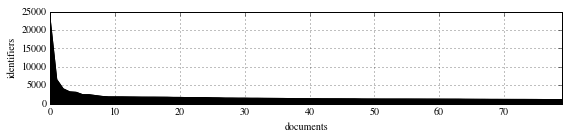

In [39]:
density[:80].plot(kind='area', use_index=0, figsize=(8, 2), color='black')
plt.ylabel('identifiers')
plt.xlabel('documents')
plt.tight_layout()

plt.savefig('figures/en-wiki-doc-ids-1.pdf', format='pdf')
plt.show()

In [22]:
density.describe()

count    22512.000000
mean        85.238539
std        219.156659
min          2.000000
25%         12.000000
50%         33.000000
75%         91.000000
max      22766.000000
dtype: float64

In [127]:
density[:10]

20848    22766
7569      6528
4035      4004
4275      3175
9817      3051
4226      2407
7523      2397
14455     2162
4729      1934
11510     1813
dtype: int64

In [12]:
titles[20848], titles[7569]

(u'Euclidean algorithm', u'Lambda lifting')

In [16]:
print u', '.join([u'%s (%d)' % f for f in ids[20848].most_common()])

s (2372), t (2309), r (2044), n (2018), o (1692), u (1353), b (1282), h (1200), l (1142), d (1006), m (964), c (808), p (686), g (593), f (590), v (338), y (299), x (298), w (240), k (200), T (146), q (143), E (117), N (92), C (89), D (70), S (70), G (64), z (54), B (52), H (46), F (39), M (39), L (35), j (31), P (29), O (23), R (19), J (18), K (14), W (14), V (12), q_0 (8), Y (8), q_1 (7), r_0 (7), U (6), r_1 (6), π (5), Q (4), q_2 (4), q_N (4), X (3), h_i (3), τ (3), ϕ (2), s_r (2), t_a (2), m_12 (2), m_11 (2), t_1964 (2), m_22 (2), m_21 (2), q_i (2), r_2 (2), p_E (1), n_1954 (1), l_1983 (1), s_1832 (1), g_1983 (1), m_k (1), ϵ (1), s_A (1), g_U (1), ζ (1), n_1962 (1), Λ (1), γ (1), c_E (1), f_l (1), q_k (1), r_W (1), n_k (1), n_d (1), n_a (1), h_T (1), s_1994 (1), y_2002 (1), r_k (1), h_0 (1), r_21 (1), r_216 (1), z_2003 (1)


In [17]:
print u', '.join([u'%s (%d)' % f for f in ids[7569].most_common()])

x (927), f (701), p (534), λ (525), q (354), V (343), D (288), de (161), lambda (161), n (160), E (157), y (127), g (117), F (117), build (98), param (95), let (95), m (78), L (76), lists (72), X (69), drop (62), o (59), N (53), G (50), S (44), Y (44), get (37), params (37), lift (36), S_3 (34), F_6 (30), S_6 (29), H (28), M (28), F_3 (27), S_4 (27), choice (26), list (26), K (25), F_2 (24), F_1 (22), tran (22), W (22), K_2 (22), sink (21), R (21), F_4 (20), combine (18), F_7 (18), S_5 (18), P (16), S_1 (16), S_2 (16), S_7 (16), K_1 (14), F_5 (14), K_5 (11), formal (10), ¬ (10), F_9 (9), test (9), call (8), B (8), make (8), free (7), anon (7), S_8 (7), F_10 (6), M_1 (6), N_1 (6), S_9 (6), T_3 (6), T_6 (6), L_3 (5), M_2 (5), N_2 (5), Z (5), T_1 (5), K_10 (4), L_2 (4), merge (4), named (4), v (4), S_10 (4), T_2 (4), T_7 (4), T_4 (4), T_5 (4), K_9 (4), L_1 (4), K_7 (4), F_8 (3), w (3), apply (3), process (3), K_3 (3), K_4 (3), K_6 (3), t (2), M_3 (2), N_3 (2), T_10 (2), r (2), T_8 (2), T_

In [28]:
uniq_density = pd.Series([len(l.values()) for l in ids])
uniq_density.sort(inplace=1, ascending=0)

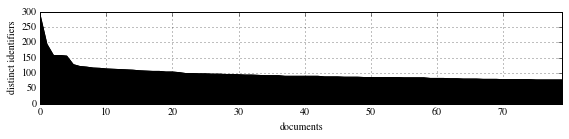

In [40]:
uniq_density[:80].plot(kind='area', use_index=0, figsize=(8, 2), color='black')
plt.ylabel('distinct identifiers')
plt.xlabel('documents')
plt.tight_layout()

plt.savefig('figures/en-wiki-doc-ids-2.pdf', format='pdf')
plt.show()

In [34]:
uniq_density.describe()

count    22512.000000
mean        13.736541
std         12.809700
min          2.000000
25%          5.000000
50%         10.000000
75%         18.000000
max        287.000000
dtype: float64

In [33]:
print uniq_density[:10]

print titles[4226]
print titles[21943]

4226     287
21943    194
9817     157
863      157
6822     155
3008     127
16829    121
10966    119
7523     116
10507    115
dtype: int64
Hooke's law
Dimensionless quantity


In [42]:
def_density = pd.Series([len(l) for l in rels])
def_density.sort(inplace=1, ascending=0)

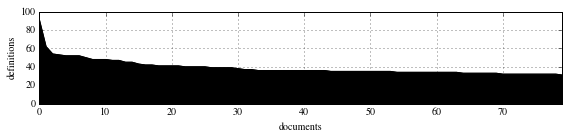

In [45]:
def_density[:80].plot(kind='area', use_index=0, figsize=(8, 2), color='black')
plt.ylabel('definitions')
plt.xlabel('documents')
plt.tight_layout()

plt.savefig('figures/en-wiki-doc-def.pdf', format='pdf')
plt.show()

In [46]:
def_density.describe()

count    22512.000000
mean         5.121580
std          5.285136
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         91.000000
dtype: float64

## Loading data: continued

In [7]:
title_idx = {title: idx for (idx, title) in enumerate(titles)}

for doc, cats in doc_categories.items():
    if doc in title_idx:
        continue

    for cat in cats: 
        category_docs[cat].remove(doc)
    
    del doc_categories[doc]

print len(doc_categories)

22512


In [8]:
doc_categories_list = [doc_categories[doc] for doc in titles]

Let's remove definitions that occur just once - they are most likely noise

In [9]:
def_freq = Counter()

for def_dict in rels: 
    for id, def_list in def_dict.items():
        def_freq.update([d for d, s in def_list])

print def_freq.most_common(22)

[(u'time', 2464), (u'length', 1325), (u'distance', 1246), (u'matrix', 1230), (u'form', 1199), (u'radius', 1115), (u'mass', 1080), (u'angle', 1030), (u'order', 951), (u'sequence', 913), (u'degree', 904), (u'field', 880), (u'space', 879), (u'group', 786), (u'probability', 777), (u'temperature', 771), (u'velocity', 753), (u'constants', 735), (u'dimension', 714), (u'density', 700), (u'state', 661), (u'frequency', 640)]


In [10]:
low_freq_def = {id for id, cnt in def_freq.items() if cnt == 1}
print len(low_freq_def)

for def_dict in rels: 
    for id, def_list in def_dict.items():
        clean_def_list = []
        for definition, score in def_list:
            if definition not in low_freq_def:
                clean_def_list.append((definition, score))
        
        if not clean_def_list:
            del def_dict[id]
        else:
            def_dict[id] = clean_def_list

35144


Let's keep a copy of identifiers

In [11]:
ids = [id_counter(d['identifiers']) for d in docs]

In [12]:
import cluster_evaluation

In [13]:
reload(cluster_evaluation)
evaluate = cluster_evaluation.Evaluator(doc_titles=titles, doc_ids=ids, 
                                        doc_ids_definitions=rels, doc_categories=doc_categories_list)

In [14]:
all_ids = Counter()

for id_cnt in ids:
    all_ids.update(id_cnt)

infrequent = set()
min_count = 2

for (el, cnt) in all_ids.items():
    if cnt <= min_count:
        infrequent.add(el)

for id_cnt in ids:
    for id in (set(id_cnt) & infrequent):
        del id_cnt[id]

del all_ids
del infrequent

for def_dict in rels: 
    common = set(def_dict) & mc
    for id in common:
        del def_dict[id]

Now let's incorporate definitions into the vector space

In [15]:
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')

In [16]:
for idx in xrange(N_doc):
    vals = rels[idx].items()
    id_list = ids[idx]

    for id, definitions in vals:
        for definition, score in definitions:
            unigrams = definition.lower().split()
            id_list[id] = id_list[id] + 1
            
            for unigram in unigrams:
                stem = snowball_stemmer.stem(unigram)
                id_list[stem] = id_list[stem] + 1

In [17]:
ids[201]

Counter({u'R': 4, u'digit': 2, u'check': 2, u'N_4': 1, u'N_1': 1, u'N_2': 1, u'N_3': 1, u'remaind': 1})

## Random assignment

In [14]:
cluster_ids_base = np.arange(0, N_doc) / 3

In [15]:
total = []
for i in xrange(200):
    np.random.shuffle(cluster_ids_base)
    res = len(evaluate.high_purity_clusters(cluster_ids_base, threshold=0.8, min_size=3))
    print res,
    total.append(res)

26 20 23 28 35 26 30 26 21 34 17 25 25 22 27 20 22 25 25 22 27 25 16 24 29 28 19 30 27 30 26 30 30 24 26 20 28 28 19 24 33 24 21 21 18 22 16 17 18 19 26 28 20 27 25 31 26 28 20 27 18 21 21 19 21 26 24 26 30 35 28 18 27 29 17 18 18 20 22 19 27 29 16 17 23 26 19 24 29 27 34 36 25 21 19 25 27 22 25 30 26 23 28 26 20 30 22 25 29 25 20 16 24 26 25 24 28 22 25 21 19 21 21 19 25 34 21 28 23 26 23 23 24 18 26 22 22 22 24 18 31 28 24 16 27 26 23 26 26 23 21 23 21 28 22 27 18 25 19 19 17 30 23 26 22 21 19 20 29 29 23 19 20 29 17 18 22 17 19 32 19 25 16 25 29 23 26 17 21 27 21 26 23 39 22 27 18 22 25 16


In [27]:
np.unique(total)

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 39])

In [29]:
pd.Series(total).describe()

count    200.000000
mean      23.850000
std        4.539885
min       16.000000
25%       20.000000
50%       24.000000
75%       27.000000
max       39.000000
dtype: float64

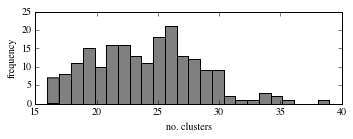

In [31]:
plt.figure(figsize=(5, 2))
plt.hist(total, bins=24, color='gray')

plt.xlabel('no. clusters')
plt.ylabel('frequency')

plt.tight_layout()

plt.savefig('figures/baseline.pdf', format='pdf')

plt.show()

##  K-means

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, randomized_svd

In [21]:
def unwrap_counter(cnt):
    res = []
    for id, c in cnt.items():
        res.extend([id] * c)
    return res

vectorizer = TfidfVectorizer(analyzer=unwrap_counter, use_idf=True, sublinear_tf=True, min_df=2)
X = vectorizer.fit_transform(ids)

In [22]:
X

<22512x10419 sparse matrix of type '<type 'numpy.float64'>'
	with 485337 stored elements in Compressed Sparse Row format>

In [21]:
485337.0 / (X.shape[0] * X.shape[1])

0.002069203875730557

In [23]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(copy=False)

In [23]:
from sklearn.cluster import KMeans, MiniBatchKMeans

Let's try different number of orthogonal vectors in LSA basis

In [82]:
svd_results = []
times = []

ns = range(50, 1001, 100)
for n in ns:
    for i in xrange(5):
        t0 = time()
        U, S, Vt = randomized_svd(X, n_components=n)
        V = Vt.T

        X_red = X.dot(V)
        X_red = normalizer.fit_transform(X_red)
        svd_results.append((n, X_red))

        taken_time = time() - t0
        times.append((n, taken_time))
        print "k=%d, done in %0.5fs." % (n, taken_time)

k=50, done in 0.88900s.
k=50, done in 0.61100s.
k=50, done in 0.70600s.
k=50, done in 0.59200s.
k=50, done in 0.62100s.
k=150, done in 2.57100s.
k=150, done in 2.34200s.
k=150, done in 2.65200s.
k=150, done in 2.95700s.
k=150, done in 2.41300s.
k=250, done in 4.18600s.
k=250, done in 4.70100s.
k=250, done in 4.36800s.
k=250, done in 4.04800s.
k=250, done in 4.03200s.
k=350, done in 7.32700s.
k=350, done in 7.35100s.
k=350, done in 7.53600s.
k=350, done in 7.59100s.
k=350, done in 7.40700s.
k=450, done in 10.95000s.
k=450, done in 11.02000s.
k=450, done in 12.57600s.
k=450, done in 12.39100s.
k=450, done in 10.98300s.
k=550, done in 15.00900s.
k=550, done in 15.30500s.
k=550, done in 17.59700s.
k=550, done in 15.17900s.
k=550, done in 14.99000s.
k=650, done in 19.36700s.
k=650, done in 22.17200s.
k=650, done in 19.39000s.
k=650, done in 21.22300s.
k=650, done in 20.49300s.
k=750, done in 26.40200s.
k=750, done in 26.30000s.
k=750, done in 24.73000s.
k=750, done in 24.94400s.
k=750, done

In [102]:
del svd_results

In [66]:
from sklearn.decomposition import NMF

In [83]:
ks, ts = zip(*times)

In [84]:
import statsmodels.formula.api as sm

In [85]:
model = sm.OLS(ts, ks).fit()
model.rsquared

0.93149963711111328

In [86]:
df = pd.DataFrame({'k': ks, 'time': ts})

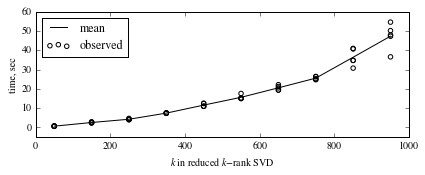

In [106]:
fig = plt.figure(figsize=(6, 2.5))

plt.scatter(df.k, df.time, facecolors='none', label='observed')

means = df.groupby('k').mean()
plt.plot(means.index, means.time, label='mean', color='black')

plt.xlim(0, 1000)
plt.ylim(-5, 60)
plt.ylabel('time, sec')
plt.xlabel('$k$ in reduced $k$-rank SVD')

# plt.grid()

legend = plt.legend(loc='upper left', frameon=1)
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

plt.tight_layout()

plt.savefig('figures/k-svd-vs-time.pdf', format='pdf')

plt.show()

In [67]:
t0 = time()

n = 250

nmf = NMF(n_components=n)
X_red_grid = nmf.fit_transform(X)
X_red_grid = normalizer.fit_transform(X_red_grid)

print "done in %0.3fs." % (time() - t0)

done in 5269.633s.


In [48]:
km_grid_hyperparam_res = {}
km_grid_hyperparam_lr = []

In [59]:
for n in [150, 250, 350]:
    U, S, Vt = randomized_svd(X, n_components=n)
    V = Vt.T

    X_red_grid = X.dot(V)
    X_red_grid = normalizer.fit_transform(X_red_grid)

    # ks = [k for k in xrange(500, 15001, 250)]
    # ks = [k for k in xrange(8000, 15001, 250)]
    ks = [k for k in xrange(500, 8000, 250)]
    
    for k in ks:
        km_grid = MiniBatchKMeans(n_clusters=k, init_size=k*3, n_init=10, init='random')
        km_grid.fit(X_red_grid)

        km_grid_hyperparam_res[(n, k)] = km_grid.labels_
        cluster_purity = evaluate.overall_purity(km_grid.labels_)
        no_pure_clusters = len(evaluate.high_purity_clusters(km_grid.labels_, threshold=0.8, min_size=3))
        km_grid_hyperparam_lr.append((n, k, cluster_purity, no_pure_clusters))

        print 'purity for n=%d, k=%d is %0.4f, number of >0.8 clusters: %d' % (n, k, cluster_purity, no_pure_clusters)

purity for n=150, k=500 is 0.2464, number of >0.8 clusters: 19
purity for n=150, k=750 is 0.2434, number of >0.8 clusters: 22
purity for n=150, k=1000 is 0.2874, number of >0.8 clusters: 40
purity for n=150, k=1250 is 0.3003, number of >0.8 clusters: 53
purity for n=150, k=1500 is 0.3127, number of >0.8 clusters: 65
purity for n=150, k=1750 is 0.3290, number of >0.8 clusters: 87
purity for n=150, k=2000 is 0.3440, number of >0.8 clusters: 101
purity for n=150, k=2250 is 0.3503, number of >0.8 clusters: 109
purity for n=150, k=2500 is 0.3643, number of >0.8 clusters: 117
purity for n=150, k=2750 is 0.3694, number of >0.8 clusters: 113
purity for n=150, k=3000 is 0.3747, number of >0.8 clusters: 114
purity for n=150, k=3250 is 0.3905, number of >0.8 clusters: 140
purity for n=150, k=3500 is 0.3963, number of >0.8 clusters: 134
purity for n=150, k=3750 is 0.4115, number of >0.8 clusters: 151
purity for n=150, k=4000 is 0.4250, number of >0.8 clusters: 185
purity for n=150, k=4250 is 0.434

In [19]:
import pickle

In [60]:
pickle.dump(km_grid_hyperparam_res, file('C:/tmp/mlp/namespaces/k-means-def-cleaned-07-23-svd2.bin', 'w'))

km_grid_hyperparam_res = pickle.load(file('C:/tmp/mlp/namespaces/k-means-def-cleaned-07-23-svd2.bin'))

In [61]:
df_nf = pd.DataFrame(km_grid_hyperparam_lr, columns=['n', 'k', 'purity', 'sizes'])
df_nf.head()

,n,k,purity,sizes
0,150,8000,0.569385,322
1,150,8250,0.579558,310
2,150,8500,0.586665,333
3,150,8750,0.597814,346
4,150,9000,0.603634,324


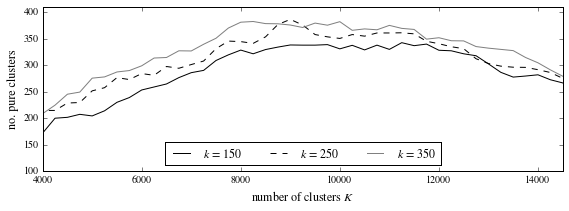

In [65]:
visual = {150: ('black', '-'), 250: ('black', '--'), 350: ('grey', '-')}

for n, g in df_nf.groupby('n'):
    color, line = visual[n]
    med = g.groupby('k').sizes.median()
    smoothed = pd.stats.moments.rolling_mean(med, window=3, center=True)
    smoothed.plot(figsize=(8, 3), label='$k$ = %d' % n, color=color, linestyle=line)


plt.grid(0)
plt.xlabel('number of clusters $K$')
plt.ylabel('no. pure clusters')
plt.legend(loc='lower center', ncol=3)
plt.xlim(4000, 14500)
plt.ylim(100, 410)

plt.tight_layout()
plt.savefig('figures/k-vs-kmeans-len-svd-soft.pdf', format='pdf')
plt.show()

In [73]:
df_nf.ix[df_nf.sizes.argmax()]

n          350.000000
k         9750.000000
purity       0.633573
sizes      414.000000
Name: 65, dtype: float64

In [50]:
pickle.dump(clustering, file('C:/tmp/mlp/namespaces/best414.bin', 'w'))

In [22]:
clustering = pickle.load(file('C:/tmp/mlp/namespaces/best414.bin'))

In [49]:

evaluate.report_overall(clustering, purity_threshold=0.8, min_size=3, sort_by='size')

overall purity 0.6336
number of high purity clusters of size at least 5 is 414

- Astronomical catalogues (id=1150) size=53, purity=0.9811
- Statistics (id=5389) size=20, purity=0.8500
- Category theory (id=2245) size=16, purity=0.8125
- Electromagnetism (id=6026) size=12, purity=0.8333
- Thermodynamics (id=608) size=11, purity=0.8182
- Mathematical analysis (id=4579) size=11, purity=0.8182
- Graph theory (id=3171) size=10, purity=0.9000
- Graph algorithms (id=4436) size=10, purity=0.8000
- Fluid dynamics (id=5619) size=10, purity=1.0000
- National Basketball Association seasons (id=476) size=9, purity=1.0000
- Numerical analysis (id=6957) size=9, purity=0.8889
- Group theory (id=7228) size=9, purity=1.0000
- Stochastic processes (id=7416) size=9, purity=1.0000
- Measure theory (id=1271) size=8, purity=1.0000
- Probability distributions (id=1588) size=8, purity=0.8750
- Signal processing (id=2484) size=8, purity=0.8750
- Mechanics (id=3040) size=8, purity=1.0000
- Stochastic processes 

In [84]:
evaluate.print_cluster(clustering, 8246)

cluster 8246, size: 3
- Mean squared error (categories: Statistics, Signal processing, Control theory, Statistical theory, Machine learning, ...) predict random gaussian sampl size γ_2 squar X_n unknown X_i estim μ_4 θ paramet μ σ E distribut χ bernoulli X_1 regressor S Y_i Y X varianc true popul central m moment n p error mean
- Basu's theorem (categories: Statistics, Mathematical theorems, Statistical theory, Statistical inference, Inference, ...) random famili variabl suffici space X_i θ μ t σ B distribut normal P T X varianc measur d n statist P_θ margin mean
- Bias of an estimator (categories: Statistics, Statistical theory, Scientific theories, Estimation theory, Statistical deviation and dispersion, ...) constant process number expect unbias maximum-likelihood distribut fix X_i estim δ reason θ λ μ statist σ E D rise N P S T X ticket varianc data averag popul c g m l n p s t poisson x model observ

common terms: (σ varianc distribut n X θ X_i μ)
top categories: (Statistics, 3), 

In [24]:
def print_iddef(rel):
    for id in sorted(rel.keys()):      
        print u'%s:' % id,

        defs = sorted(rel[id], key=lambda t: -t[1])
        for df, score in defs:
            print u'(%s, %0.2f),' % (df, score),
        print

In [111]:
print_iddef(rels[title_idx['Mean squared error']])
print 
print_iddef(rels[title_idx["Basu's theorem"]])
print
print_iddef(rels[title_idx['Bias of an estimator']])
print 

Y: (predictions, 0.87),
n: (predictions, 0.95), (size, 0.92), (random sample, 0.82), (population, 0.82),
p: (regressors, 0.96), (Bernoulli distribution, 0.88),
γ_2: (Gaussian distribution, 0.86),
θ: (estimator, 0.98), (unknown parameter, 0.98), (unknown parameter, 0.94),
μ: (true mean, 0.96), (population, 0.89),
μ_4: (central moment, 0.83),
σ: (population variance, 0.86), (square error, 0.83), (estimators, 0.82),

P_θ: (family, 0.87),
T: (marginal distributions, 0.95),
X: (measurable space, 0.95),
θ: (sufficient statistic, 0.93),
μ: (mean, 0.99), (variance, 0.95), (random variables, 0.89), (normal, 0.83),
σ: (variance, 0.99), (mean, 0.83),

S: (reason, 0.87),
X: (Poisson, 0.82),
n: (tickets, 0.96), (maximum-likelihood estimator, 0.89),
x: (data, 0.99), (observations, 0.93),
δ: (unbiased estimator, 0.99), (expectation, 0.83),
θ: (statistic, 0.95), (estimator, 0.93), (estimator, 0.93), (rise, 0.91), (statistical model, 0.85), (fixed constant, 0.82),
λ: (expectation, 0.99), (distribution,

In [112]:
def combine(rel_list):
    dct = defaultdict(list)
    
    for rel in rel_list:
        for id, defs in rel.items():
            dct[id].extend(defs)
    
    return dct

In [116]:
d1 = rels[title_idx['Mean squared error']]
d2 = rels[title_idx["Basu's theorem"]]
d3 = rels[title_idx['Bias of an estimator']]

print_iddef(combine([d1, d2, d3]))

P_θ: (family, 0.87),
S: (reason, 0.87),
T: (marginal distributions, 0.95),
X: (measurable space, 0.95), (Poisson, 0.82),
Y: (predictions, 0.87),
n: (tickets, 0.96), (predictions, 0.95), (size, 0.92), (maximum-likelihood estimator, 0.89), (random sample, 0.82), (population, 0.82),
p: (regressors, 0.96), (Bernoulli distribution, 0.88),
x: (data, 0.99), (observations, 0.93),
γ_2: (Gaussian distribution, 0.86),
δ: (unbiased estimator, 0.99), (expectation, 0.83),
θ: (estimator, 0.98), (unknown parameter, 0.98), (statistic, 0.95), (unknown parameter, 0.94), (estimator, 0.93), (sufficient statistic, 0.93), (estimator, 0.93), (rise, 0.91), (statistical model, 0.85), (fixed constant, 0.82),
λ: (expectation, 0.99), (distribution, 0.86), (process, 0.83), (average number, 0.83), (Poisson, 0.81),
μ: (mean, 0.99), (true mean, 0.96), (expectation, 0.96), (variance, 0.95), (variance, 0.93), (random variables, 0.89), (population, 0.89), (population, 0.89), (normal, 0.83),
μ_4: (central moment, 0.83),
σ

In [80]:
evaluate.find_identifier(clustering, purity_threshold=0.8, min_size=3, id=u'λ', collection_weighting=0)

overall purity 0.6336
number of high purity clusters of size at least 5 is 414

category "Category theory", cluster_id=56, size=3:
top categories: [(u'Category theory', 3), (u'Multilinear algebra', 3), (u'Monoidal categories', 3), (u'Closed categories', 1), (u'Dagger categories', 1)]
     λ: (natural isomorphisms: 0.84), (identities: 0.83)
category "Complex analysis", cluster_id=57, size=6:
top categories: [(u'Complex analysis', 6), (u'Number theory', 6), (u'Moduli theory', 6), (u'Modular forms', 6), (u'Automorphic forms', 6)]
     λ: (cancellation: 0.95)
category "Coordinate systems", cluster_id=313, size=3:
top categories: [(u'Coordinate systems', 3), (u'Cartography', 3), (u'Cartographic projections', 3), (u'Equal-area projections', 2)]
     λ: (longitude*: 2.74), (formulas: 0.89)
category "Probability distributions", cluster_id=373, size=6:
top categories: [(u'Probability distributions', 5), (u'Continuous distributions', 5), (u'Exponential family distributions', 3), (u'Normal distri

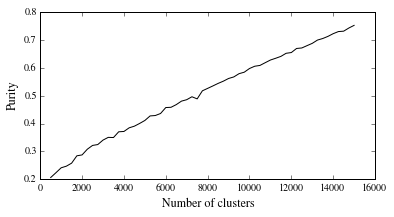

In [55]:
plt.figure(figsize=(6, 3))
plt.plot(ks, purity, color='black')
# plt.title('Purity vs number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Purity')

plt.savefig('figures/purity.pdf', format='pdf')
plt.show()

In [56]:
pure_counts = np.array(len_pure)
smoothed= pd.stats.moments.rolling_mean(pure_counts, window=7, center=True)

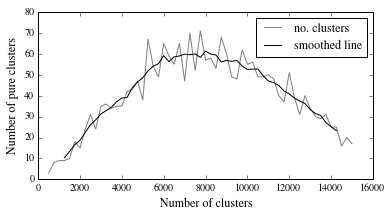

In [60]:
plt.figure(figsize=(6, 3))
plt.plot(ks, pure_counts, color='grey', label='no. clusters')
plt.plot(ks, smoothed, color='black', label='smoothed line')
# plt.title('Number of pure clusters vs number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Number of pure clusters')
plt.legend(loc='best')#lower center')

plt.savefig('figures/pure-clusters.pdf', format='pdf')
plt.show()

In [47]:
evaluate.find_identifier(km_grid_hyperparam_res[9000], purity_threshold=0.8, id=u'σ', collection_weighting=0)

overall purity 0.5828
number of high purity clusters of size at least 5 is 82

category "Thermodynamic entropy", cluster_id=68, size=5:
top categories: [(u'Thermodynamic entropy', 4), (u'Entropy and information', 4), (u'Quantum mechanical entropy', 4), (u'Entropy', 4), (u'Quantum information theory', 4)]
     σ: (quantum states*: 1.75), (density matrices*: 1.70), (hilbert: 0.84)
category "Quantum mechanics", cluster_id=412, size=5:
top categories: [(u'Quantum mechanics', 4), (u'Quantum chemistry', 2), (u'Computational chemistry', 2), (u'Physical chemistry', 2), (u'Theoretical chemistry', 2)]
     σ: (notation: 0.87)
category "Quantum mechanics", cluster_id=1057, size=16:
top categories: [(u'Quantum mechanics', 14), (u'Particle physics', 8), (u'Theoretical physics', 7), (u'Physics', 6), (u'Mechanics', 5)]
     σ: (annihilation operators: 0.99), (polarization: 0.89), (creation: 0.89), (quasi-momentum: 0.89), (orbit interaction couple spin matrices: 0.89)
category "Gravitation", cluster_i

In [ ]:
evaluate.find_identifierf

## NNMF

In [119]:
from sklearn.decomposition import NMF

In [117]:
km_grid_hyperparam_res = {}
km_grid_hyperparam_lr = []

In [120]:
for n in [150, 250, 350]:  
    t0 = time()

    nmf = NMF(n_components=n)
    X_red_grid = nmf.fit_transform(X)
    X_red_grid = normalizer.fit_transform(X_red_grid)

    print "n=%d done in %0.3fs." % (n, (time() - t0))
    
    ks = [k for k in xrange(500, 15001, 250)]
    for k in ks:
        km_grid = MiniBatchKMeans(n_clusters=k, init_size=k*3, n_init=10, init='random')
        km_grid.fit(X_red_grid)

        km_grid_hyperparam_res[(n, k)] = km_grid.labels_
        cluster_purity = evaluate.overall_purity(km_grid.labels_)
        no_pure_clusters = len(evaluate.high_purity_clusters(km_grid.labels_, threshold=0.8, min_size=3))
        km_grid_hyperparam_lr.append((n, k, cluster_purity, no_pure_clusters))

        print 'purity for n=%d, k=%d is %0.4f, number of >0.8 clusters: %d' % (n, k, cluster_purity, no_pure_clusters)

n=150 done in 3036.993s.
purity for n=150, k=500 is 0.2319, number of >0.8 clusters: 13
purity for n=150, k=750 is 0.2525, number of >0.8 clusters: 22
purity for n=150, k=1000 is 0.2686, number of >0.8 clusters: 39
purity for n=150, k=1250 is 0.2713, number of >0.8 clusters: 47
purity for n=150, k=1500 is 0.2965, number of >0.8 clusters: 57
purity for n=150, k=1750 is 0.3122, number of >0.8 clusters: 88
purity for n=150, k=2000 is 0.3133, number of >0.8 clusters: 52
purity for n=150, k=2250 is 0.3248, number of >0.8 clusters: 64
purity for n=150, k=2500 is 0.3362, number of >0.8 clusters: 97
purity for n=150, k=2750 is 0.3548, number of >0.8 clusters: 95
purity for n=150, k=3000 is 0.3620, number of >0.8 clusters: 101
purity for n=150, k=3250 is 0.3697, number of >0.8 clusters: 130
purity for n=150, k=3500 is 0.3798, number of >0.8 clusters: 146
purity for n=150, k=3750 is 0.3997, number of >0.8 clusters: 162
purity for n=150, k=4000 is 0.4035, number of >0.8 clusters: 164
purity for n

In [123]:
pickle.dump(km_grid_hyperparam_res, file('C:/tmp/mlp/namespaces/k-means-def-cleaned-07-23-nmf2.bin', 'w'))

In [121]:
df_nf = pd.DataFrame(km_grid_hyperparam_lr, columns=['n', 'k', 'purity', 'sizes'])
df_nf.head()

,n,k,purity,sizes
0,150,500,0.231921,13
1,150,750,0.252488,22
2,150,1000,0.268612,39
3,150,1250,0.271278,47
4,150,1500,0.296509,57


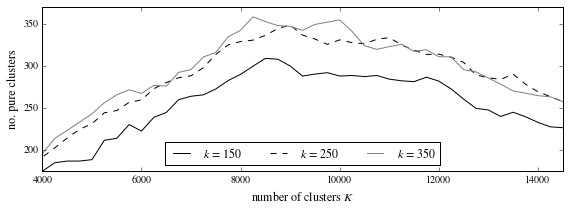

In [130]:
visual = {150: ('black', '-'), 250: ('black', '--'), 350: ('grey', '-')}

for n, g in df_nf.groupby('n'):
    color, line = visual[n]
    med = g.groupby('k').sizes.median()
    smoothed = pd.stats.moments.rolling_mean(med, window=3, center=True)
    smoothed.plot(figsize=(8, 3), label='$k$ = %d' % n, color=color, linestyle=line)


plt.grid(0)
plt.xlabel('number of clusters $K$')
plt.ylabel('no. pure clusters')
plt.legend(loc='lower center', ncol=3)
plt.xlim(4000, 14500)
plt.ylim(175, 370)

plt.tight_layout()
plt.savefig('figures/k-vs-kmeans-len-nmf-soft.pdf', format='pdf')
plt.show()

In [131]:
df_nf.ix[df_nf.sizes.argmax()]

n           350.000000
k         10000.000000
purity        0.629264
sizes       374.000000
Name: 156, dtype: float64

### Weighting vs $K$-Means

In [132]:
vectorizer = TfidfVectorizer(analyzer=unwrap_counter, use_idf=False, sublinear_tf=False, min_df=2)
X_tf = vectorizer.fit_transform(ids)

vectorizer = TfidfVectorizer(analyzer=unwrap_counter, use_idf=False, sublinear_tf=True, min_df=2)
X_ltf = vectorizer.fit_transform(ids)

vectorizer = TfidfVectorizer(analyzer=unwrap_counter, use_idf=True, sublinear_tf=False, min_df=2)
X_tfidf = vectorizer.fit_transform(ids)

vectorizer = TfidfVectorizer(analyzer=unwrap_counter, use_idf=True, sublinear_tf=True, min_df=2)
X_ltfidf = vectorizer.fit_transform(ids)

In [134]:
Xs = {'TF': X_tf, 'logTF': X_ltf, 'TF-IDF': X_tfidf, 'logTF-IDF': X_ltfidf}
types_res = []
n = 100

In [135]:
for t, X_star in Xs.items():
    print 'trying %s...' % t

    U, S, Vt = randomized_svd(X_star, n_components=n)
    V = Vt.T

    X_red = X.dot(V)
    X_red = normalizer.fit_transform(X_red)

    ks = [k for k in xrange(6000, 13001, 1000)]
    for k in ks:
        km_grid = MiniBatchKMeans(n_clusters=k, init_size=k*3, n_init=10, init='random')
        km_grid.fit(X_red)
        no_pure_clusters = len(evaluate.high_purity_clusters(km_grid.labels_, threshold=0.8, min_size=3))

        types_res.append((t, k, no_pure_clusters))
        print 'k=%d, number of >0.8 clusters: %d' % (k, no_pure_clusters)

    print

trying TF...
k=6000, number of >0.8 clusters: 188
k=7000, number of >0.8 clusters: 209
k=8000, number of >0.8 clusters: 287
k=9000, number of >0.8 clusters: 276
k=10000, number of >0.8 clusters: 280
k=11000, number of >0.8 clusters: 287
k=12000, number of >0.8 clusters: 240
k=13000, number of >0.8 clusters: 229

trying logTF...
k=6000, number of >0.8 clusters: 228
k=7000, number of >0.8 clusters: 238
k=8000, number of >0.8 clusters: 288
k=9000, number of >0.8 clusters: 282
k=10000, number of >0.8 clusters: 292
k=11000, number of >0.8 clusters: 278
k=12000, number of >0.8 clusters: 267
k=13000, number of >0.8 clusters: 275

trying TF-IDF...
k=6000, number of >0.8 clusters: 199
k=7000, number of >0.8 clusters: 234
k=8000, number of >0.8 clusters: 258
k=9000, number of >0.8 clusters: 270
k=10000, number of >0.8 clusters: 275
k=11000, number of >0.8 clusters: 272
k=12000, number of >0.8 clusters: 255
k=13000, number of >0.8 clusters: 229

trying logTF-IDF...
k=6000, number of >0.8 clusters

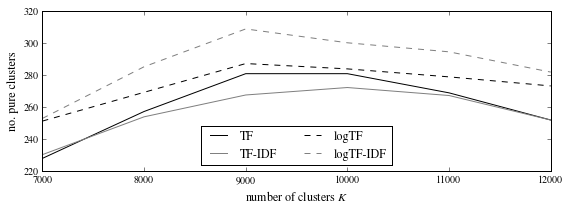

In [143]:
df_weight = pd.DataFrame(types_res, columns=('scheme', 'K', 'no'))

visual = {'TF': ('black', '-'), 'logTF': ('black', '--'), 'TF-IDF': ('grey', '-'), 'logTF-IDF': ('grey', '--')}

for n, g in df_weight.groupby('scheme'):
    color, line = visual[n]
    med = g.groupby('K').no.median()
    smoothed = pd.stats.moments.rolling_mean(med, window=3, center=True)
    smoothed.plot(figsize=(8, 3), label=n, color=color, linestyle=line)


plt.grid(0)
plt.xlabel('number of clusters $K$')
plt.ylabel('no. pure clusters')
plt.legend(loc='lower center', ncol=2)
plt.xlim(7000, 12000)
plt.ylim(220, 320)

plt.tight_layout()
plt.savefig('figures/soft-weighing.pdf', format='pdf')
plt.show()

## Random projections

In [145]:
from sklearn import random_projection

In [154]:
rp_res = []

In [156]:
for i in xrange(4):
    print 'trying %s...' % i
    
    rp = random_projection.GaussianRandomProjection(n_components=250)
    X_new = rp.fit_transform(X)
    X_new = normalizer.fit_transform(X_new)
    
    ks = [k for k in xrange(6000, 13001, 250)]
    for k in ks:
        km_grid = MiniBatchKMeans(n_clusters=k, init_size=k*3, n_init=10, init='random')
        km_grid.fit(X_new)
        no_pure_clusters = len(evaluate.high_purity_clusters(km_grid.labels_, threshold=0.8, min_size=3))

        rp_res.append((i, k, no_pure_clusters))
        print 'k=%d, number of >0.8 clusters: %d' % (k, no_pure_clusters)

    print

trying 0...


KeyboardInterrupt: 

## DB-SCAN

### COSINE

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [25]:
k = 50

def print_cnt(cnt):
    for id, c in cnt.most_common():
        print u'(%s, %d)' % (id, c),
        
def chunks(X, step):
    l = X.shape[0]
    for i in xrange(0, l, step):
        if i + step < l:
            yield i, i+step, X[i:i+step]
        else:
            yield i, l, X[i:l]

In [26]:
t0 = time()

top_indexes = []
cos_sim_matrix = scipy.sparse.dok_matrix((N_doc, N_doc))

for beg, end, X_chunk in chunks(X, 500):
    print 'step (%d, %d) of len %d...' % (beg, end, end - beg)
    X_500 = X_chunk * X.T
    
    for j in xrange(end - beg):
        row = X_500.getrow(j)
        sim_indx = row.data.argsort()[::-1][:(k+1)]
        cos_sim_matrix[beg + j, row.indices[sim_indx]] = row.data[sim_indx]
        top_indexes.append(row.indices[sim_indx][1:])

cos_sim_matrix = scipy.sparse.csr_matrix(cos_sim_matrix)
print "done in %0.3fs." % (time() - t0)

step (0, 500) of len 500...
step (500, 1000) of len 500...
step (1000, 1500) of len 500...
step (1500, 2000) of len 500...
step (2000, 2500) of len 500...
step (2500, 3000) of len 500...
step (3000, 3500) of len 500...
step (3500, 4000) of len 500...
step (4000, 4500) of len 500...
step (4500, 5000) of len 500...
step (5000, 5500) of len 500...
step (5500, 6000) of len 500...
step (6000, 6500) of len 500...
step (6500, 7000) of len 500...
step (7000, 7500) of len 500...
step (7500, 8000) of len 500...
step (8000, 8500) of len 500...
step (8500, 9000) of len 500...
step (9000, 9500) of len 500...
step (9500, 10000) of len 500...
step (10000, 10500) of len 500...
step (10500, 11000) of len 500...
step (11000, 11500) of len 500...
step (11500, 12000) of len 500...
step (12000, 12500) of len 500...
step (12500, 13000) of len 500...
step (13000, 13500) of len 500...
step (13500, 14000) of len 500...
step (14000, 14500) of len 500...
step (14500, 15000) of len 500...
step (15000, 15500) of l

In [28]:
doc1 = title_idx['Linear regression']
doc2 = top_indexes[doc1][0]

print titles[doc1]
print_cnt(ids[doc1])
print 

print titles[doc2]
print_cnt(ids[doc2])
print 

print 'common'
print_cnt(ids[doc1] & ids[doc2])
print 

print 'cosine', X[doc1] * X[doc2].T

Linear regression
(T, 18) (X, 15) (ε_i, 11) (y, 11) (x_i, 9) (β, 9) (x, 9) (Z, 8) (m, 8) (n, 8) (p, 8) (h_i, 4) (β_1, 4) (y_i, 4) (variabl, 3) (t_i, 3) (β_2, 3) (condit, 3) (distribut, 3) (regressor, 2) (Ω, 2) (ε, 2) (probabl, 2) (linear, 2) (moment, 2) (β_p, 2) (height, 1) (random, 1) (capit, 1) (scalar, 1) (p-vector, 1) (affin, 1) (unit, 1) (depend, 1) (ε_2, 1) (transpos, 1) (regress, 1) (y_2, 1) (y_n, 1) (ε_1, 1) (inner, 1) (explanatori, 1) (graviti, 1) (statist, 1) (function, 1) (product, 1) (ball, 1) (form, 1) (x_11, 1) (error, 1) (term, 1) (initi, 1) (standard, 1) (joint, 1) (data, 1) (disturb, 1) (predictor, 1) (ε_n, 1) (y_1, 1) (x_21, 1) (t, 1) (time, 1) (model, 1) (veloc, 1) (mean, 1)
Linear predictor function
(x, 19) (β, 13) (c, 11) (p, 11) (X, 10) (T, 9) (f, 8) (m, 8) (x_i, 7) (ε_i, 7) (b, 6) (ϕ, 5) (y, 5) (β_p, 4) (β_0, 3) (β_1, 3) (ε, 2) (y_i, 2) (matrix, 2) (distanc, 1) (term, 1) (point, 1) (random, 1) (continu, 1) (rank, 1) (c_1, 1) (ϕ_2, 1) (ϕ_1, 1) (transpos, 1) (varia

In [29]:
import snn_dbscan

In [30]:
snn_res_params = []
snn_res = {}

In [31]:
ks = [10, 13]

for k_snn in ks:
    snn_graph = []

    for i, idx in enumerate(top_indexes):
        snn_graph.append(set(idx[:k_snn]))

    epsilons = [3, 4, 5, 6, 7, 8, 9, 10]
    poins = [3, 4, 5, 6, 7, 8, 9, 10]
    
    for eps in epsilons:
        for min_pts in poins:
            res = np.array(snn_dbscan.dbscan(snn_graph, eps, min_pts))
            res[res == 'noise'] = 0
            res = res.astype(int)

            pur = evaluate.overall_purity(res)
            no = len(evaluate.high_purity_clusters(res, threshold=0.8, min_size=3))
        
            snn_res_params.append((k_snn, eps, min_pts, pur, no))
            snn_res[(k_snn, eps, min_pts)] = res
    
            print 'k=%d, eps=%d, min_pts=%d => purity=%0.4f, len=%d' % (k_snn, eps, min_pts, pur, no)

k=10, eps=3, min_pts=3 => purity=0.4284, len=223
k=10, eps=3, min_pts=4 => purity=0.4068, len=207
k=10, eps=3, min_pts=5 => purity=0.3909, len=191
k=10, eps=3, min_pts=6 => purity=0.3761, len=170
k=10, eps=3, min_pts=7 => purity=0.3629, len=150
k=10, eps=3, min_pts=8 => purity=0.3503, len=143
k=10, eps=3, min_pts=9 => purity=0.3334, len=135
k=10, eps=3, min_pts=10 => purity=0.3169, len=119
k=10, eps=4, min_pts=3 => purity=0.3778, len=221
k=10, eps=4, min_pts=4 => purity=0.3522, len=179
k=10, eps=4, min_pts=5 => purity=0.3316, len=149
k=10, eps=4, min_pts=6 => purity=0.3152, len=121
k=10, eps=4, min_pts=7 => purity=0.3031, len=98
k=10, eps=4, min_pts=8 => purity=0.2865, len=88
k=10, eps=4, min_pts=9 => purity=0.2696, len=80
k=10, eps=4, min_pts=10 => purity=0.2502, len=74
k=10, eps=5, min_pts=3 => purity=0.3066, len=193
k=10, eps=5, min_pts=4 => purity=0.2770, len=141
k=10, eps=5, min_pts=5 => purity=0.2544, len=125
k=10, eps=5, min_pts=6 => purity=0.2333, len=92
k=10, eps=5, min_pts=7 

In [35]:
snn_df = pd.DataFrame(snn_res_params, columns=('k_snn', 'eps', 'min_pts', 'pur', 'no'))

In [45]:
snn10 = snn_df[snn_df.k_snn == 10][['eps', 'min_pts', 'no']]
snn10 = snn10.groupby(by=['eps', 'min_pts']).mean()
snn10.unstack()

no                                   
min_pts   3    4    5    6    7    8    9    10
eps                                            
3        223  207  191  170  150  143  135  119
4        221  179  149  121   98   88   80   74
5        193  141  125   92   75   51   45   33
6        132   83   69   45   31   21   16   15
7         88   52   35   23   17   10    8    9
8         38   21   14    9    8    6    4    4
9         10    6    5    3    2    2    2    2
10         6    5    4    2    2    1    1    0

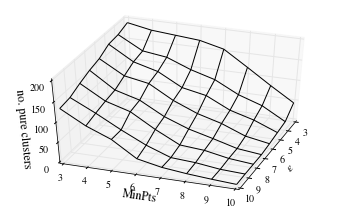

In [42]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111, projection='3d')

Xs, Ys = np.meshgrid(epsilons, poins)
# plot surface, more colormaps: http://matplotlib.sourceforge.net/examples/pylab_examples/show_colormaps.html
# ax.plot_surface(Xs, Ys, Zs, rstride=4, cstride=4, alpha=0.4,cmap=cm.jet)

ax.plot_wireframe(Xs, Ys, snn10.unstack(), color='black')
ax.view_init(elev=40, azim=20)
ax.set_xlabel(r'$\varepsilon$')
ax.set_ylabel('MinPts')
ax.set_zlabel('no. pure clusters')

plt.tight_layout()
plt.savefig('figures/soft-dbscan-cos13.pdf', format='pdf')
plt.show()

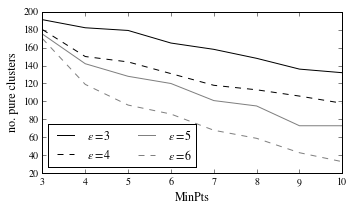

In [44]:
visual = {3: ('black', '-'), 4: ('black', '--'), 5: ('grey', '-'), 6: ('grey', '--')}

for i, n in snn10.reset_index().groupby('eps'):
    if i in visual:
        color, line = visual[i]
        n.set_index('min_pts').no.plot(figsize=(5, 3), color=color, linestyle=line, label=r'$\varepsilon=%d$' % i)

plt.grid(0)
plt.legend(ncol=2, loc='lower left')

plt.xlabel('MinPts')
plt.ylabel('no. pure clusters')
plt.tight_layout()
plt.savefig('figures/soft-dbscan-cos13-2.pdf', format='pdf')
plt.show()